# Calculus for Machine Learning

## Derivatives and Limits (Calculus I)
- study of the rates of change

### 1. Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 1000) #start, finish , step

In [3]:
y = x**2 + 2*x +2

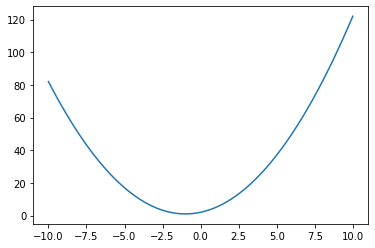

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y)

Lets find the point where the slope is equal to zero!

[(-1.01, -0.99), (0.99, 1.01)]

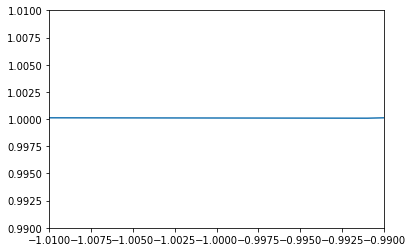

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlim=[-1.01, -0.99], ylim=[0.99, 1.01])

### 1. Limits
- trivial for continuous functions; 

e.g. finding $y$ for $x=5$ in the equation $x^2+2x+2$?

of course we can just substitute $x$ in the equation!.

- for a not continous function; e.g.

$\displaystyle{\lim_{x \to +1} \frac{x^2-1}{x-1}}$

we cannot just replace 1 in $x$, otherwise we have a zero denominator.

How to proceed?

In [6]:
import matplotlib.pyplot as plt

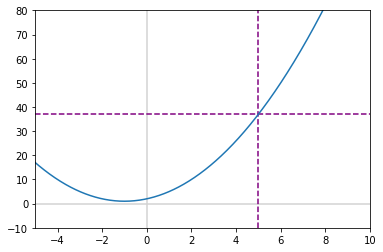

In [7]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-5, 10)
plt.ylim(-10, 80)
plt.axvline(x=5, color='purple', linestyle='--')
plt.axhline(y=37, color='purple', linestyle='--')
ax.plot(x, y)

In [8]:
def my_fxn(my_x):
    my_y = (my_x**2 - 1)/(my_x - 1)
    return my_y

In [9]:
my_fxn(2) 

3.0

In [10]:
# my_fxn(1) # does not work of course

In [11]:
# empirically we can do:
my_fxn(0.999) 

1.9989999999999712

In [12]:
my_fxn(1.00001)

2.0000100000008274

In [13]:
y = my_fxn(x)

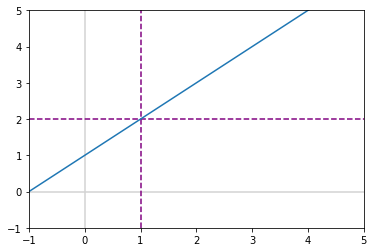

In [14]:
# graphically we can also see that the limit is 2
# also we can factorize and solve the limit, simply by doing algebra

fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axvline(x=1, color='purple', linestyle='--')
plt.axhline(y=2, color='purple', linestyle='--')
ax.plot(x, y)

In a different function,

$\displaystyle{\lim_{x \to 0} \frac{\sin(x)}{x}}$


In [15]:
def sin_fxn(my_x):
    my_y = np.sin(my_x)/my_x
    return my_y

In [16]:
sin_fxn(0.00001)

0.9999999999833332

In [17]:
sin_fxn(-0.00001)

0.9999999999833332

In [18]:
y = sin_fxn(x)

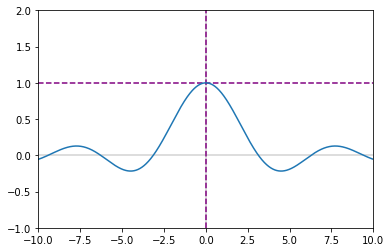

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-1, 2)
plt.axvline(x=0, color='purple', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')
ax.plot(x, y)

**Approaching infinity**: 

$\displaystyle{\lim_{x \to +\infty} \frac{25}{x}}$

In [20]:
def inf_fxn(my_x):
    my_y = 25/my_x
    return my_y

In [21]:
inf_fxn(1e6)

2.5e-05

In [22]:
y = inf_fxn(x)

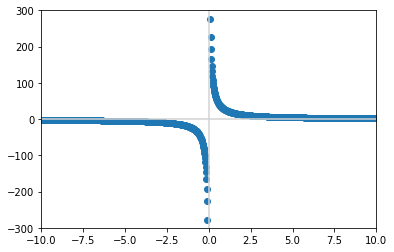

In [23]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
ax.scatter(x, y)

### Derivatives and Differentiation

In [24]:
def f(my_x):
    my_y = my_x**2 + 2*my_x +2
    return my_y

In [25]:
y = f(x)

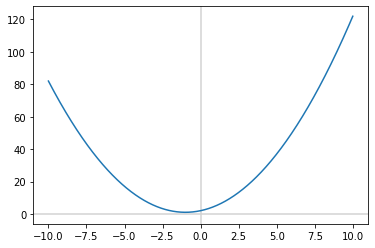

In [26]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.plot(x, y)

In [27]:
f(2)

10

In [28]:
f(5)

37

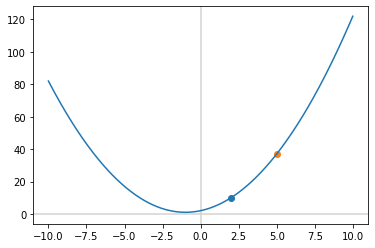

In [29]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.plot(x, y)
ax.scatter(2, 10)
ax.scatter(5, 37)

#### Delta method
- the slope of the line : change in y / change in x

- $\frac{y_2-y_1}{x_2-x_1}$

In [30]:
# the slope is:
m = (37-10)/(5-2)
m

9.0

In [31]:
b = 37-m*5

In [32]:
line_y = m*x + b

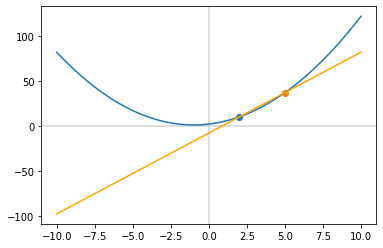

In [33]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.plot(x, y)
ax.scatter(2, 10)
ax.scatter(5, 37)
ax.plot(x, line_y, c='orange')

The closer the two points are ($\lim_{\Delta x \to 0}$), the closer the first-order line is closer to the real tangent.


$\displaystyle{\frac{dy}{dx}} = \displaystyle{\lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}} = \displaystyle{\lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}}$

### The Chain Rule!
- Many applications within ML
- Gradient descent in general
- Critical for backpropagation algorithm used to train neural networks

$\displaystyle{\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}}$

- Based on nested functions (composite functions), an example:

$y=(5x+25)^3$

$u=5x+25$

$y=u^3$

- $y$ is a function of $u$, and $u$ is a function of $x$

### Automatic Differentiation
- Different from delta method (this method introduces rounding errors) and symbolic differentiation (algebraic rules, which are computationally inefficient)
- Autodiff deals better with fucntions with many inputs (common in ML)
- How it works?

        Applications of chain rule (partial derivative) to sequence (forward pass) arithmetic operations, autodiff proceeds from the outermost fucntions inward.

#### Autodiff in Pytorch

In [34]:
import torch

In [35]:
x = torch.tensor(5.0)
x

tensor(5.)

In [36]:
x.requires_grad_() # contagiously track gradients through foward pass

tensor(5., requires_grad=True)

In [37]:
y = x**2

In [38]:
y.backward() # use autodiff

In [39]:
x.grad

tensor(10.)

#### Autodiff in TensorFlow

In [40]:
import tensorflow as tf

In [41]:
x = tf.Variable(5.0)

In [42]:
with tf.GradientTape() as t:
    t.watch(x) # track the variable
    y = x**2

In [43]:
t.gradient(y, x) # use autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

Lets use AutoDiff in Pytorch to fit a straight line, aka solve a regression problem

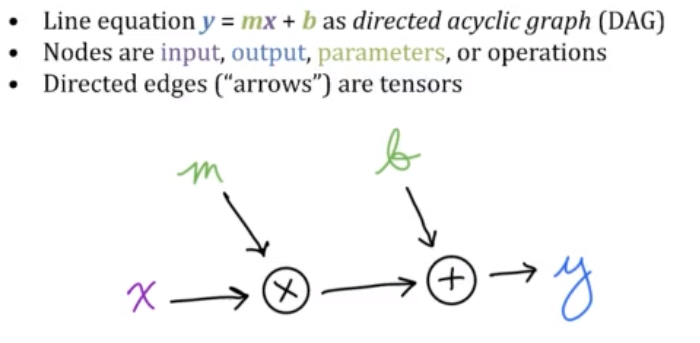

In [44]:
import torch
import matplotlib.pyplot as plt

In [45]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [46]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
y

tensor([ 1.9580,  1.4850,  0.9698,  0.1730, -0.1411, -0.4377, -1.0497, -1.5672])

In [47]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

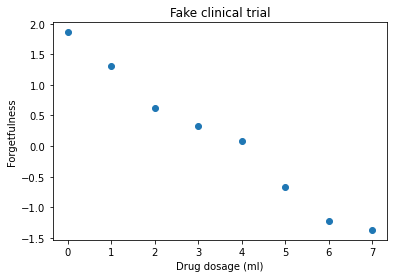

In [48]:
fig, ax =  plt.subplots()
plt.title("Fake clinical trial")
plt.xlabel("Drug dosage (ml)")
plt.ylabel("Forgetfulness")
ax.scatter(x, y)

Lets initialize the slope parameter $m$ with a random value of 0.2... 

In [49]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [50]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [51]:
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    
    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = my_m*x_min + my_b, my_m*x_max + my_b
#     print([y_min, y_max])
    
    ax.set_xlim([x_min, x_max])
    ax.plot([x_min, x_max], [y_min.detach().numpy(), y_max.detach().numpy()])

In [52]:
def regression(my_x, my_m, my_b):
    return my_x*my_m + my_b

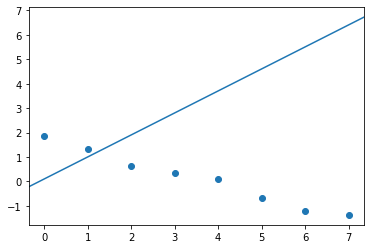

In [53]:
regression_plot(x, y, m, b) # the line does not fit the plot well, just an example

How to make this fit better using AutoDiff?

### Cost/Lost Functions

- Nested functions inside cost function: $C = g(\hat y, y)$, $\hat y$ being the predicted value and $y$ the true label.
- We know that $\hat y = f(x, m, b)$, a function of $x$, $b$ and $m$
- So we have the nested function: $C = g(f(x, m, b), y)$, we then need partial derivatives to optimize the cost/loss function using the chain rule of derivatives.
- By knowing the slope (derivative), we know how we can change the parameters of the model ($m$ and $b$) to reduce the cost ($C$)
- We ca have billions of parameters (DL) but the idea is the same, always adjusting the parameters (in the example $m$ and $b$) and the refinding the slope (derivative), and repeating it over and over again, meaning getting $\hat y$ the closest to $y$.

Lets now try to use these ideas to compute a real problem, knwoing that a common cost function is the MSE (mean squared error):

$\displaystyle{C = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2}$

- Cost comes out always positive and, due to squaring, the bigger the difference between $\hat y$ and $y$, the error will get exponentially bigger (small errors are accepted and bigger errors penalized)

**Step 1:** Forward pass

In [54]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2:** Compare $\hat y$ with true $y$ to calculate $C$

In [55]:
def mse (my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [56]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3:** Use AutoDiff to calculate the gradient of $C$

In [57]:
C.backward()

In [58]:
m.grad
# positive slope: if reduces m, reduces C

tensor([36.3050])

In [59]:
b.grad
# positive param b: if reduces b, reduces C

tensor([6.2650])

**Step 4:** Gradient descent

In [60]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [61]:
optimizer.step()

In [62]:
m
# m was originally 0.2

tensor([0.5369], requires_grad=True)

In [63]:
b
# b was originally 0.1

tensor([0.0374], requires_grad=True)

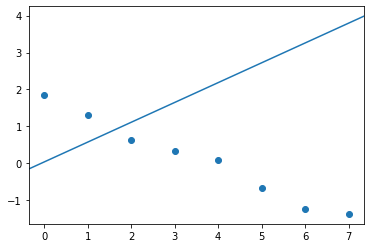

In [64]:
regression_plot(x, y, m, b)

Lets now repeat these steps, putting them into a for loop:

In [65]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

In [66]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() # reset gradients to zero, else they accumulate
    
    yhat = regression(x, m, b) # step 1
    C = mse(yhat, y) # step 2
    
    C.backward() # step 3
    optimizer.step() # step 4
    
    print('epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

epoch 0, cost 8.57, m grad 23.2, b grad 3.6
epoch 1, cost 4.08, m grad 14.8, b grad 1.91
epoch 2, cost 2.25, m grad 9.49, b grad 0.831
epoch 3, cost 1.51, m grad 6.11, b grad 0.15
epoch 4, cost 1.2, m grad 3.96, b grad -0.28
epoch 5, cost 1.07, m grad 2.59, b grad -0.552
epoch 6, cost 1.01, m grad 1.72, b grad -0.723
epoch 7, cost 0.981, m grad 1.17, b grad -0.829
epoch 8, cost 0.962, m grad 0.82, b grad -0.894
epoch 9, cost 0.948, m grad 0.595, b grad -0.934
epoch 10, cost 0.936, m grad 0.452, b grad -0.957
epoch 11, cost 0.925, m grad 0.361, b grad -0.969
epoch 12, cost 0.915, m grad 0.302, b grad -0.975
epoch 13, cost 0.904, m grad 0.265, b grad -0.977
epoch 14, cost 0.894, m grad 0.241, b grad -0.976
epoch 15, cost 0.884, m grad 0.225, b grad -0.973
epoch 16, cost 0.874, m grad 0.214, b grad -0.969
epoch 17, cost 0.864, m grad 0.207, b grad -0.965
epoch 18, cost 0.854, m grad 0.202, b grad -0.96
epoch 19, cost 0.845, m grad 0.199, b grad -0.955
epoch 20, cost 0.835, m grad 0.196, b

epoch 339, cost 0.0399, m grad 0.0306, b grad -0.15
epoch 340, cost 0.0396, m grad 0.0304, b grad -0.149
epoch 341, cost 0.0394, m grad 0.0302, b grad -0.149
epoch 342, cost 0.0392, m grad 0.03, b grad -0.148
epoch 343, cost 0.0389, m grad 0.0299, b grad -0.147
epoch 344, cost 0.0387, m grad 0.0297, b grad -0.146
epoch 345, cost 0.0385, m grad 0.0295, b grad -0.145
epoch 346, cost 0.0383, m grad 0.0293, b grad -0.144
epoch 347, cost 0.0381, m grad 0.0292, b grad -0.143
epoch 348, cost 0.0378, m grad 0.029, b grad -0.143
epoch 349, cost 0.0376, m grad 0.0288, b grad -0.142
epoch 350, cost 0.0374, m grad 0.0287, b grad -0.141
epoch 351, cost 0.0372, m grad 0.0285, b grad -0.14
epoch 352, cost 0.037, m grad 0.0283, b grad -0.139
epoch 353, cost 0.0368, m grad 0.0282, b grad -0.139
epoch 354, cost 0.0366, m grad 0.028, b grad -0.138
epoch 355, cost 0.0364, m grad 0.0279, b grad -0.137
epoch 356, cost 0.0362, m grad 0.0277, b grad -0.136
epoch 357, cost 0.036, m grad 0.0275, b grad -0.135
e

epoch 550, cost 0.0212, m grad 0.00902, b grad -0.0444
epoch 551, cost 0.0212, m grad 0.00897, b grad -0.0441
epoch 552, cost 0.0212, m grad 0.00892, b grad -0.0439
epoch 553, cost 0.0212, m grad 0.00887, b grad -0.0436
epoch 554, cost 0.0212, m grad 0.00882, b grad -0.0433
epoch 555, cost 0.0211, m grad 0.00876, b grad -0.0431
epoch 556, cost 0.0211, m grad 0.00872, b grad -0.0429
epoch 557, cost 0.0211, m grad 0.00866, b grad -0.0426
epoch 558, cost 0.0211, m grad 0.00862, b grad -0.0424
epoch 559, cost 0.0211, m grad 0.00856, b grad -0.0421
epoch 560, cost 0.021, m grad 0.00851, b grad -0.0419
epoch 561, cost 0.021, m grad 0.00847, b grad -0.0416
epoch 562, cost 0.021, m grad 0.00842, b grad -0.0414
epoch 563, cost 0.021, m grad 0.00837, b grad -0.0412
epoch 564, cost 0.021, m grad 0.00832, b grad -0.0409
epoch 565, cost 0.021, m grad 0.00827, b grad -0.0407
epoch 566, cost 0.0209, m grad 0.00822, b grad -0.0404
epoch 567, cost 0.0209, m grad 0.00818, b grad -0.0402
epoch 568, cost 

epoch 760, cost 0.0196, m grad 0.00268, b grad -0.0132
epoch 761, cost 0.0196, m grad 0.00266, b grad -0.0131
epoch 762, cost 0.0196, m grad 0.00265, b grad -0.013
epoch 763, cost 0.0196, m grad 0.00263, b grad -0.0129
epoch 764, cost 0.0196, m grad 0.00262, b grad -0.0129
epoch 765, cost 0.0196, m grad 0.0026, b grad -0.0128
epoch 766, cost 0.0196, m grad 0.00259, b grad -0.0127
epoch 767, cost 0.0196, m grad 0.00257, b grad -0.0127
epoch 768, cost 0.0196, m grad 0.00256, b grad -0.0126
epoch 769, cost 0.0196, m grad 0.00254, b grad -0.0125
epoch 770, cost 0.0196, m grad 0.00253, b grad -0.0124
epoch 771, cost 0.0196, m grad 0.00251, b grad -0.0124
epoch 772, cost 0.0196, m grad 0.0025, b grad -0.0123
epoch 773, cost 0.0196, m grad 0.00248, b grad -0.0122
epoch 774, cost 0.0196, m grad 0.00247, b grad -0.0121
epoch 775, cost 0.0196, m grad 0.00246, b grad -0.0121
epoch 776, cost 0.0196, m grad 0.00244, b grad -0.012
epoch 777, cost 0.0196, m grad 0.00243, b grad -0.0119
epoch 778, cos

epoch 950, cost 0.0195, m grad 0.000893, b grad -0.00439
epoch 951, cost 0.0195, m grad 0.000887, b grad -0.00437
epoch 952, cost 0.0195, m grad 0.000882, b grad -0.00434
epoch 953, cost 0.0195, m grad 0.000877, b grad -0.00432
epoch 954, cost 0.0195, m grad 0.000872, b grad -0.00429
epoch 955, cost 0.0195, m grad 0.000867, b grad -0.00427
epoch 956, cost 0.0195, m grad 0.000862, b grad -0.00424
epoch 957, cost 0.0195, m grad 0.000858, b grad -0.00422
epoch 958, cost 0.0195, m grad 0.000853, b grad -0.00419
epoch 959, cost 0.0195, m grad 0.000848, b grad -0.00417
epoch 960, cost 0.0195, m grad 0.000843, b grad -0.00414
epoch 961, cost 0.0195, m grad 0.000838, b grad -0.00412
epoch 962, cost 0.0195, m grad 0.000834, b grad -0.0041
epoch 963, cost 0.0195, m grad 0.000829, b grad -0.00407
epoch 964, cost 0.0195, m grad 0.000824, b grad -0.00405
epoch 965, cost 0.0195, m grad 0.000819, b grad -0.00403
epoch 966, cost 0.0195, m grad 0.000814, b grad -0.004
epoch 967, cost 0.0195, m grad 0.0

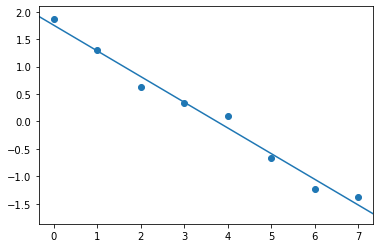

In [67]:
regression_plot(x, y, m, b)
# much better

In [68]:
m.item()

-0.4681258499622345

In [69]:
b.item()

1.7542961835861206

#### Extra exercises:

In [70]:
# PyTorch
x = torch.tensor(2.0)
x.requires_grad_()
y = x**2 + 2*x + 2 
y.backward()
x.grad

tensor(6.)

In [71]:
# TensorFlow
x = tf.Variable(2.0)

with tf.GradientTape() as t:
    t.watch(x) # track the variable
    y = x**2 + 2*x + 2 
    
t.gradient(y, x) # use autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [72]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.5)

In [73]:
m = torch.tensor([5.]).requires_grad_()
b = torch.tensor([0.2]).requires_grad_()

In [74]:
def find_params (x, y, m, b):
    epochs = 1000
    optimizer = torch.optim.SGD([m, b], lr=0.01)
    for epoch in range(epochs):
        optimizer.zero_grad() # reset gradients to zero, else they accumulate

        yhat = regression(x, m, b) # step 1
        C = mse(yhat, y) # step 2

        C.backward() # step 3
        optimizer.step() # step 4

        print('epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

In [75]:
find_params(x, y, m, b)

epoch 0, cost 474, m grad 182, b grad 35.3
epoch 1, cost 193, m grad 116, b grad 21.9
epoch 2, cost 79.6, m grad 73.7, b grad 13.3
epoch 3, cost 33.8, m grad 47, b grad 7.89
epoch 4, cost 15.2, m grad 30, b grad 4.45
epoch 5, cost 7.69, m grad 19.2, b grad 2.26
epoch 6, cost 4.64, m grad 12.3, b grad 0.872
epoch 7, cost 3.39, m grad 7.94, b grad -0.00659
epoch 8, cost 2.87, m grad 5.16, b grad -0.562
epoch 9, cost 2.64, m grad 3.39, b grad -0.912
epoch 10, cost 2.54, m grad 2.27, b grad -1.13
epoch 11, cost 2.48, m grad 1.55, b grad -1.27
epoch 12, cost 2.44, m grad 1.1, b grad -1.35
epoch 13, cost 2.41, m grad 0.809, b grad -1.4
epoch 14, cost 2.39, m grad 0.624, b grad -1.43
epoch 15, cost 2.37, m grad 0.505, b grad -1.44
epoch 16, cost 2.34, m grad 0.43, b grad -1.45
epoch 17, cost 2.32, m grad 0.381, b grad -1.45
epoch 18, cost 2.3, m grad 0.349, b grad -1.45
epoch 19, cost 2.27, m grad 0.328, b grad -1.44
epoch 20, cost 2.25, m grad 0.315, b grad -1.44
epoch 21, cost 2.23, m grad 

epoch 189, cost 0.638, m grad 0.11, b grad -0.543
epoch 190, cost 0.635, m grad 0.11, b grad -0.54
epoch 191, cost 0.632, m grad 0.109, b grad -0.537
epoch 192, cost 0.629, m grad 0.109, b grad -0.534
epoch 193, cost 0.626, m grad 0.108, b grad -0.531
epoch 194, cost 0.623, m grad 0.107, b grad -0.528
epoch 195, cost 0.62, m grad 0.107, b grad -0.525
epoch 196, cost 0.617, m grad 0.106, b grad -0.522
epoch 197, cost 0.614, m grad 0.105, b grad -0.519
epoch 198, cost 0.611, m grad 0.105, b grad -0.516
epoch 199, cost 0.609, m grad 0.104, b grad -0.513
epoch 200, cost 0.606, m grad 0.104, b grad -0.51
epoch 201, cost 0.603, m grad 0.103, b grad -0.507
epoch 202, cost 0.601, m grad 0.102, b grad -0.504
epoch 203, cost 0.598, m grad 0.102, b grad -0.501
epoch 204, cost 0.595, m grad 0.101, b grad -0.498
epoch 205, cost 0.593, m grad 0.101, b grad -0.495
epoch 206, cost 0.59, m grad 0.1, b grad -0.492
epoch 207, cost 0.588, m grad 0.0995, b grad -0.49
epoch 208, cost 0.585, m grad 0.099, b 

epoch 401, cost 0.394, m grad 0.0324, b grad -0.159
epoch 402, cost 0.394, m grad 0.0322, b grad -0.159
epoch 403, cost 0.394, m grad 0.0321, b grad -0.158
epoch 404, cost 0.394, m grad 0.0319, b grad -0.157
epoch 405, cost 0.393, m grad 0.0317, b grad -0.156
epoch 406, cost 0.393, m grad 0.0315, b grad -0.155
epoch 407, cost 0.393, m grad 0.0313, b grad -0.154
epoch 408, cost 0.393, m grad 0.0311, b grad -0.153
epoch 409, cost 0.392, m grad 0.031, b grad -0.152
epoch 410, cost 0.392, m grad 0.0308, b grad -0.151
epoch 411, cost 0.392, m grad 0.0306, b grad -0.15
epoch 412, cost 0.392, m grad 0.0304, b grad -0.15
epoch 413, cost 0.391, m grad 0.0302, b grad -0.149
epoch 414, cost 0.391, m grad 0.0301, b grad -0.148
epoch 415, cost 0.391, m grad 0.0299, b grad -0.147
epoch 416, cost 0.391, m grad 0.0297, b grad -0.146
epoch 417, cost 0.39, m grad 0.0296, b grad -0.145
epoch 418, cost 0.39, m grad 0.0294, b grad -0.145
epoch 419, cost 0.39, m grad 0.0292, b grad -0.144
epoch 420, cost 0.

epoch 614, cost 0.373, m grad 0.00946, b grad -0.0465
epoch 615, cost 0.373, m grad 0.00941, b grad -0.0463
epoch 616, cost 0.373, m grad 0.00935, b grad -0.046
epoch 617, cost 0.373, m grad 0.0093, b grad -0.0457
epoch 618, cost 0.373, m grad 0.00925, b grad -0.0455
epoch 619, cost 0.373, m grad 0.00919, b grad -0.0452
epoch 620, cost 0.373, m grad 0.00914, b grad -0.0449
epoch 621, cost 0.373, m grad 0.00909, b grad -0.0447
epoch 622, cost 0.373, m grad 0.00903, b grad -0.0444
epoch 623, cost 0.373, m grad 0.00898, b grad -0.0442
epoch 624, cost 0.373, m grad 0.00893, b grad -0.0439
epoch 625, cost 0.373, m grad 0.00888, b grad -0.0437
epoch 626, cost 0.373, m grad 0.00883, b grad -0.0434
epoch 627, cost 0.373, m grad 0.00878, b grad -0.0432
epoch 628, cost 0.373, m grad 0.00873, b grad -0.0429
epoch 629, cost 0.373, m grad 0.00868, b grad -0.0427
epoch 630, cost 0.373, m grad 0.00863, b grad -0.0424
epoch 631, cost 0.373, m grad 0.00858, b grad -0.0422
epoch 632, cost 0.373, m grad 

epoch 828, cost 0.372, m grad 0.00275, b grad -0.0135
epoch 829, cost 0.372, m grad 0.00273, b grad -0.0134
epoch 830, cost 0.371, m grad 0.00271, b grad -0.0133
epoch 831, cost 0.371, m grad 0.0027, b grad -0.0133
epoch 832, cost 0.371, m grad 0.00268, b grad -0.0132
epoch 833, cost 0.371, m grad 0.00267, b grad -0.0131
epoch 834, cost 0.371, m grad 0.00265, b grad -0.013
epoch 835, cost 0.371, m grad 0.00264, b grad -0.013
epoch 836, cost 0.371, m grad 0.00262, b grad -0.0129
epoch 837, cost 0.371, m grad 0.00261, b grad -0.0128
epoch 838, cost 0.371, m grad 0.00259, b grad -0.0127
epoch 839, cost 0.371, m grad 0.00258, b grad -0.0127
epoch 840, cost 0.371, m grad 0.00256, b grad -0.0126
epoch 841, cost 0.371, m grad 0.00255, b grad -0.0125
epoch 842, cost 0.371, m grad 0.00253, b grad -0.0125
epoch 843, cost 0.371, m grad 0.00252, b grad -0.0124
epoch 844, cost 0.371, m grad 0.0025, b grad -0.0123
epoch 845, cost 0.371, m grad 0.00249, b grad -0.0122
epoch 846, cost 0.371, m grad 0.

## Partial Derivative Calculus (Calculus II)
- understanding how we get the **step 3** result -> aka using autodiff to calculate the dgradient of the cost function
- **Partial derivatives**: a multivariate function, e.g. $z = x^2 - y^2$ cannot be derivated directly because there are multiple dependencies of the outcome **z**, meaning the variables **x** and **y**.
- visualization of mutlidimension functions in https://geogebra.org/3d
- we can derivate the multivariable function in function of one variable, maintaning the second variable as a constant

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math

### Partial Derivatives of Multivariate Functions
$f(x, y) = z = x^2 - y^2 $

In [77]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [78]:
# Plotting z with respet to x by varying x with y constant
xs = np.linspace(-3, 3, 1000) # defining x values
zs_wrt_x = f(xs, 0) # y is zero

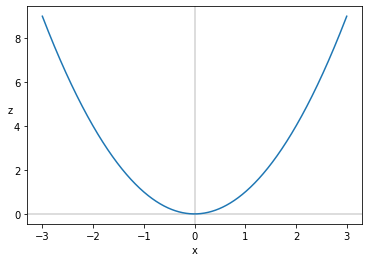

In [79]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
ax.plot(xs, zs_wrt_x)

we know that: $\displaystyle{\frac{\partial z}{\partial x} = 2x}$ and $\displaystyle{\frac{\partial z}{\partial y} = -2y}$

In [80]:
def delz_delx(my_x, my_y): # y is not relevant for this partial deriv, but not always the case
    return 2*my_x

In [81]:
x_samples = [-2, -1, 0, 1, 2]

In [82]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [83]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):
    
    my_z = my_f(my_x, my_y) # calculate z as a function of x and y
    plt.scatter(my_x, my_z, c=col, zorder=3) # plot the point z
    
    tangent_m = fprime(my_x, my_y) # slope is the partial derivative of f(x, y) wrt x
    tangent_b = my_z - tangent_m*my_x # line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

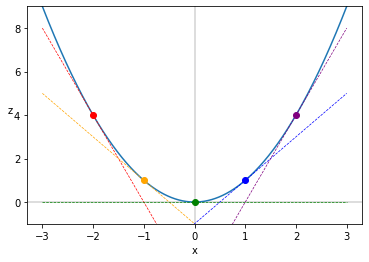

In [84]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
ax.plot(xs, zs_wrt_x)

### Partial Derivatives with Autodiff

In [85]:
x = torch.tensor(5.).requires_grad_()
x

tensor(5., requires_grad=True)

In [86]:
y = torch.tensor(7.).requires_grad_()
y

tensor(7., requires_grad=True)

In [87]:
z = f(x, y) # forward pass
z

tensor(-24., grad_fn=<SubBackward0>)

In [88]:
z.backward() # autodiff

In [89]:
x.grad

tensor(10.)

In [90]:
y.grad

tensor(-14.)

#### Partial Derivatives
- Volume of a cilinder is described by $v=\pi r^2l$ where:
$r$ is the radious and $l$ is the length

In [91]:
def cylinder_vol (my_r, my_l):
    return math.pi * my_r**2 * my_l

In [92]:
# lets sue 3 meters as an example
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [93]:
# and l = 5 
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [94]:
v = cylinder_vol(r, l)
v # forward pass

tensor(141.3717, grad_fn=<MulBackward0>)

In [95]:
v.backward()

$\displaystyle{\frac{\partial v}{\partial l} = \pi r^2}$

In [96]:
l.grad  # same partial derivative

tensor(28.2743)

This means that with $r=3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$m^3$

In [97]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [98]:
r.grad

tensor(94.2478)

#### The Chain Rule for Partial Derivative
- with a multivariate function, the partial derivatives need to be separated in function of the nested variables.


<div>
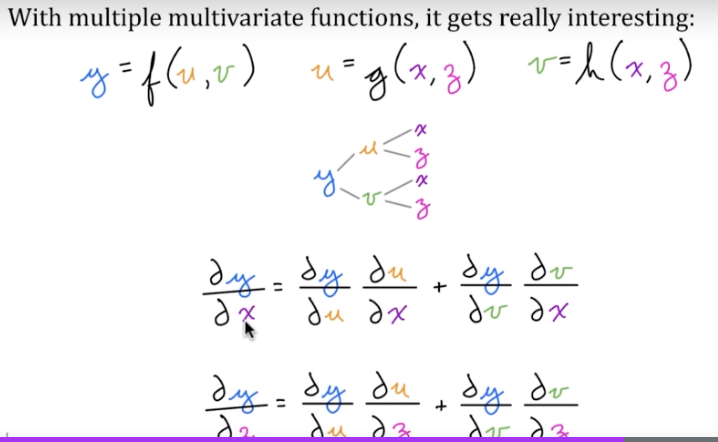
</div>


### A point-by-point Machine Learning fitting model with derivatives

<div>
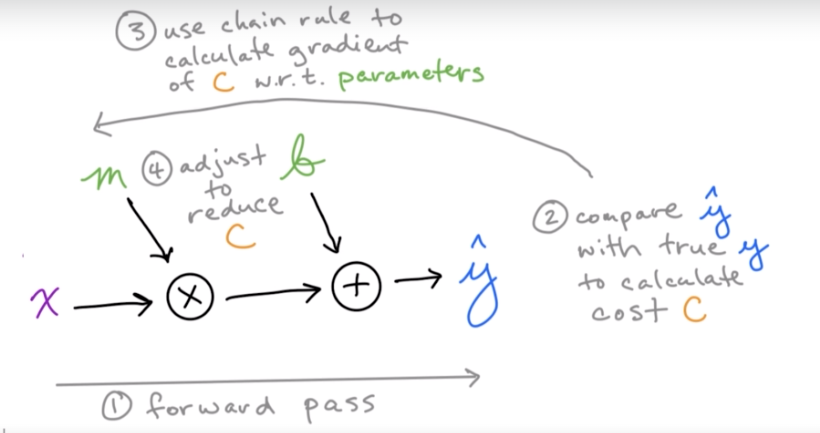
</div>


In [99]:
import torch

In [100]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])

In [101]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [102]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [103]:
m = torch.tensor([0.9]).requires_grad_()

In [104]:
b = torch.tensor([0.1]).requires_grad_()

In [105]:
i = 7
x = xs[i]
y = ys[i]

In [106]:
x

tensor(7.)

In [107]:
y

tensor(-1.3700)

**Step 1**: forward pass

In [108]:
yhat = regression(x, m, b)
yhat # y_preds

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: compare $\hat y$ to true $y$ to calculate $C$

In [109]:
def squared_error(my_hat, my_y):
    return (my_hat - my_y)**2

In [110]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: use autodiff to calculate the gradient of $C$ w.r.t. parameters

In [111]:
C.backward()

We know that our cost fucntion is $C(\hat y - y)^2$

then we can derivate as $\displaystyle{\frac{\partial C}{\partial \hat y}} = 2(\hat y - y)$

we also have our function for $\hat y$: $\hat y = mx + b$

we can then derivate as well: 

$\displaystyle{\frac{\partial \hat y}{\partial m}} = x$

$\displaystyle{\frac{\partial \hat y}{\partial b}} = 1$

Using all these results, we can chain them together:

$\displaystyle{\frac{\partial C}{\partial m} =  \frac{\partial C}{\partial \hat y} \frac{\partial \hat y}{\partial m} 
= (2(\hat y - y))x = 2x(\hat y - y)}$

$\displaystyle{\frac{\partial C}{\partial b} =  \frac{\partial C}{\partial \hat y} \frac{\partial \hat y}{\partial b} 
= (2(\hat y - y))1 = 2(\hat y - y)}$

So the derivatives become:

In [112]:
2*x*(yhat.item()-y)

tensor(108.7800)

In [113]:
2*(yhat.item()-y)

tensor(15.5400)

Using Pytorch, the partial derivative of $C$ with respect to $m\displaystyle{\frac{\partial C}{\partial m}}$ is:

In [114]:
m.grad

tensor([108.7800])

and $b\displaystyle{\frac{\partial C}{\partial b}}$ is:

In [115]:
b.grad

tensor([15.5400])

We can then obtain the same result either by "hand" or using pytorch, the way is always to use the partial derivative!

### The Gradient of Cost, $\nabla C$

It is a vector of the partial derivative of $C$ with respect to the individual model parameters.

$\nabla C = \nabla_p C = [ \frac{\partial C}{\partial p_1}, \frac{\partial C}{\partial p_2}, ...
\frac{\partial C}{\partial p_n} ]^T$

In [116]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient # we transpose to obtain a column vector

tensor([[ 15.5400],
        [108.7800]])

### Gradient of Cost on a Batch of Data
- Calculate the gradient of mean squared errur on a batch of data
- Visualize gradient descent in action

In [117]:
import torch
import matplotlib.pyplot as plt

In [118]:
xs

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [119]:
ys

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [120]:
regression

<function __main__.regression(my_x, my_m, my_b)>

In [121]:
m2 = torch.tensor([0.9]).requires_grad_()

In [122]:
b2 = torch.tensor([0.1]).requires_grad_()

**Step 1** forward pass

In [123]:
yhats = regression(xs, m2, b2)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2** Compare $\hat y$ with the true $y$ to calculate the cost $C$

In [124]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [125]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

Lets calculate the partial derivatives of $C$:
<div>
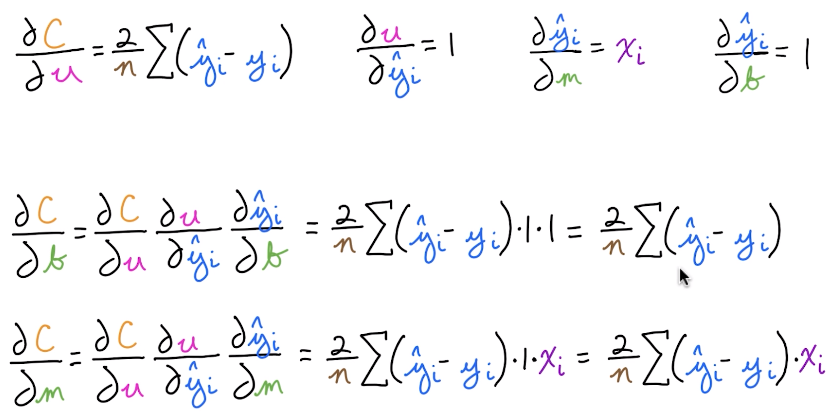
</div>

In [126]:
# del C/del m2
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

In [127]:
# del C / del b2
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

**Step 3** Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [128]:
C.backward()

In [129]:
m2.grad

tensor([36.3050])

In [130]:
b2.grad

tensor([6.2650])

In [131]:
gradient = torch.tensor([[b2.grad.item(), m2.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

Lets vizualize the most pertinent metrics ina single plot:

In [146]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
        
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    
    ax.set_xlim([x_min, x_max])
    ax.plot([x_min, x_max], [y_min.detach().numpy(), y_max.detach().numpy()], c='C01')

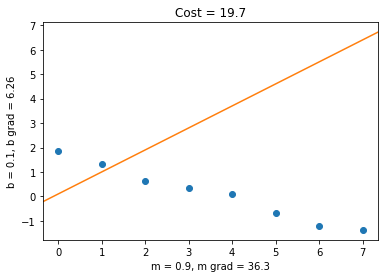

In [147]:
labeled_regression_plot(xs, ys, m2, b2, C)

The magnitude of both partial derivatives (in function of $b$ and $m$) indicates their proportionality to $C$: the partial derivative of m is 36.3, meaning it has a strong direct proportionality to $C$ - if one increases the other increases a lot also. The same happens for $m$, but the increase is smaller. So $m$ has a higher impact on $C$. 

In [157]:
optimizer = torch.optim.SGD([m2, b2], lr=0.01)

In [158]:
optimizer.step()

In [159]:
C = mse(regression(xs, m2, b2), ys)

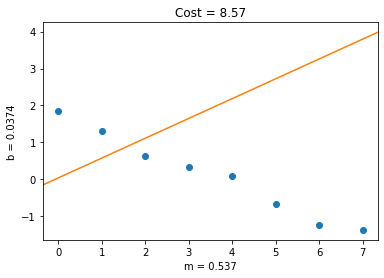

In [160]:
labeled_regression_plot(xs, ys, m2, b2, C, include_grad=False)

Now lets train multiple times:

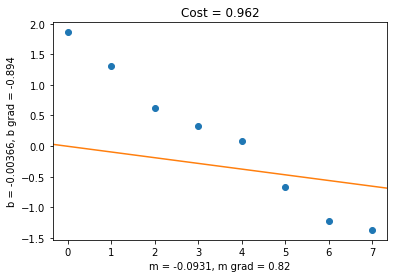

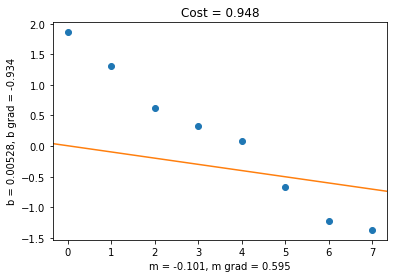

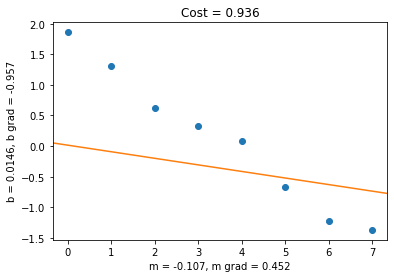

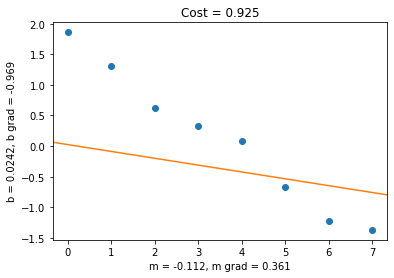

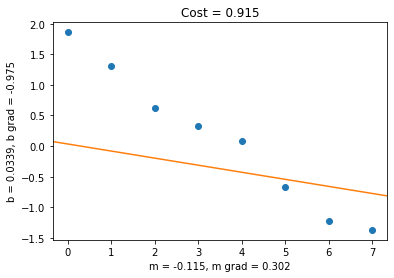

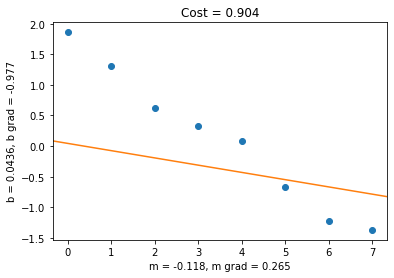

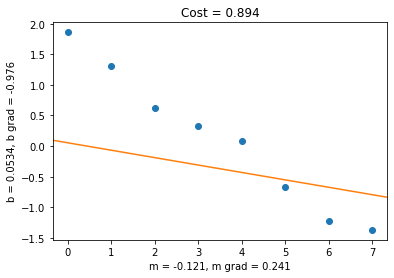

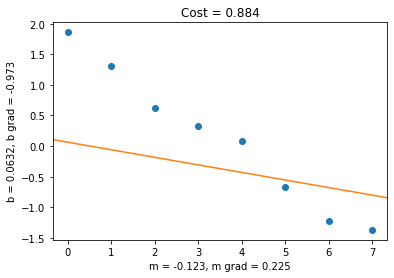

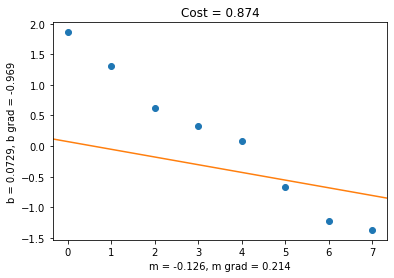

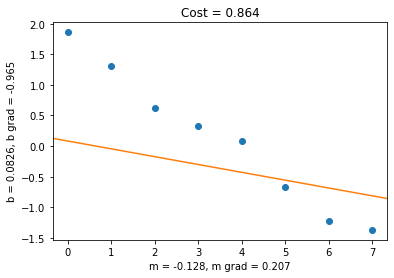

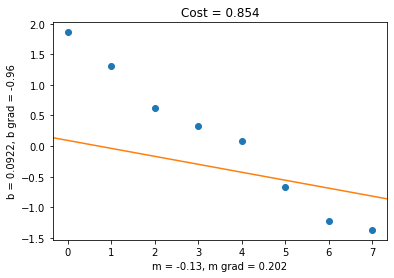

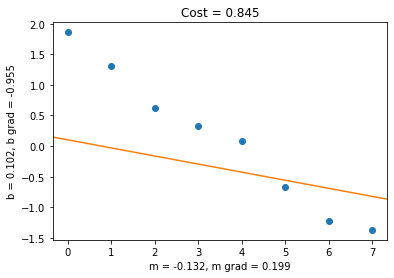

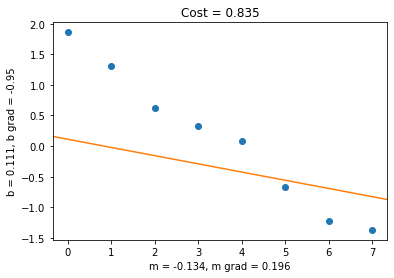

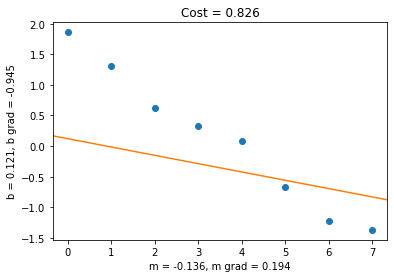

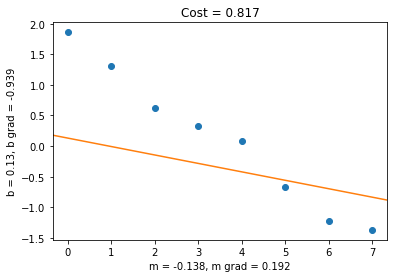

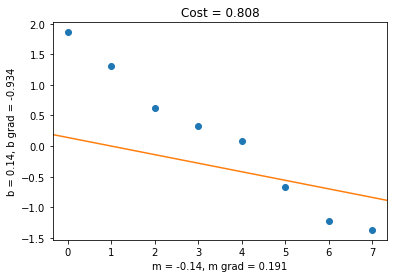

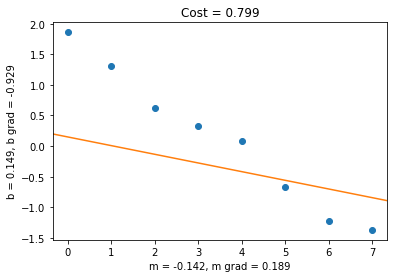

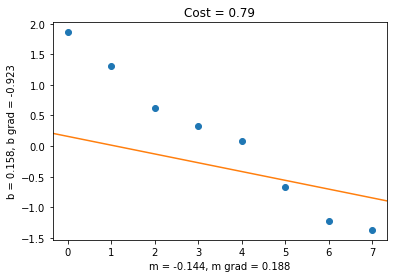

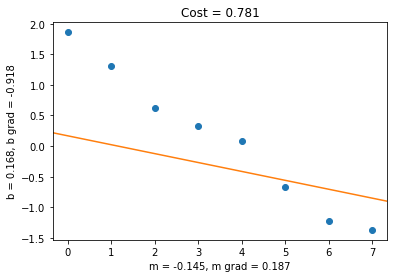

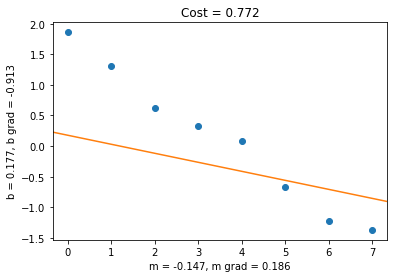

In [162]:
epochs = 20
for epoch in range(epochs):
    
    optimizer.zero_grad() # reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m2, b2) # step 1
    C = mse(yhats, ys) # step 2
    
    C.backward() # step 3
    
    labeled_regression_plot(xs, ys, m2, b2, C)
    
    optimizer.step() # step 4

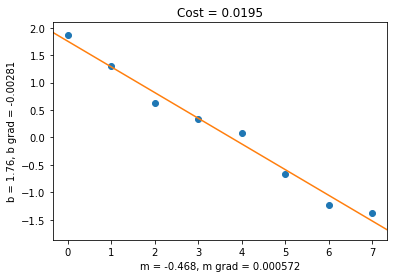

In [163]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m2, b2) # step 1
    C = mse(yhats, ys) # step 2
    
    C.backward() # step 3
    
#     labeled_regression_plot(xs, ys, m2, b2, C)
    
    optimizer.step() # step 4
    
labeled_regression_plot(xs, ys, m2, b2, C)

#### Backproppagation
- chain rule os partial derivatives of cost w.r.t. model parameters extends to the deep neural networks and it may have 1000 layers in Deep Learning
<div>
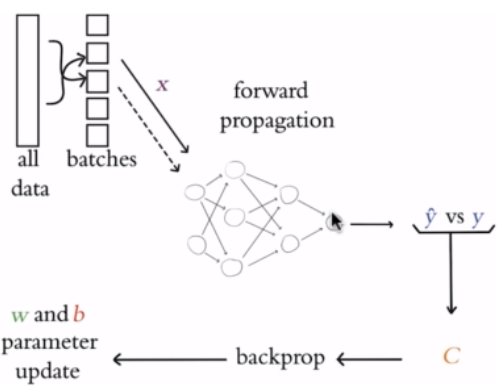
</div>

#### High-order partial derivatives
- unmixed  $(\partial^2z/\partial x^2)$ - derivate twice in a row for the second-order for example
- mixed: $(\partial^2z/\partial y \partial x)$ - same thing, derivate twice in a row, one in function of the other

## Integral Calculus (Calculus III)
- Areas under curves
- Importance in ML: 
        - Binary classification
        - Confusion matrix
        - Receiver-Operating Characteristic (ROC) curve        

### Supervised learning
- we have $x$ and $y$, the goal is to learn a function that uses $x$ to approximate $y$

1) Regression problems: sales, future value os an asset, drug dosage

2) Classification:
- Multinomial (not binomial, many classes): predict the class of one image out of many, the famous handwritten digits to classify in many classes.
- Binomial (two classes only): sick or not sick, cat or dog photos...

A single threshold does not reflect the quality at other points in output distribution.
To avoid the single threshold issue, its better to use the Receiver-Operating Characteristic (ROC)!

#### Confusion Matrix
is the algorithm confused or not?

<div>
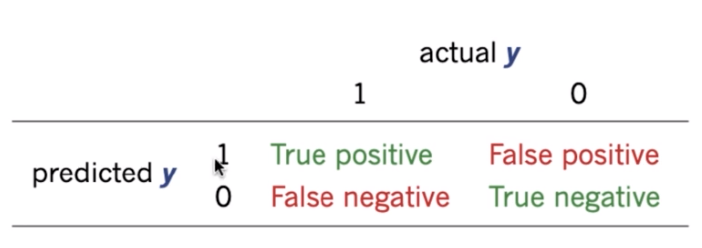
</div>

#### Receiver-Operating Characteristic (ROC)
- useful to quantify the quality of a binary classification model without just using a single threshold. It uses multiple thresholds and evaluates the confusion matrix of each new result based on the new threshold. 
- At each threshold, we evaluate the $true$ $positive$ $rate$ and the $false$ $positive$ $rate$: 

<div>
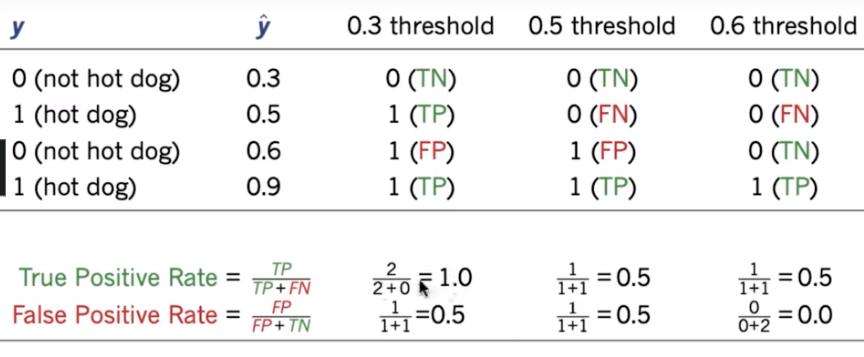
</div>

- then we can plot the rates results as

<div>
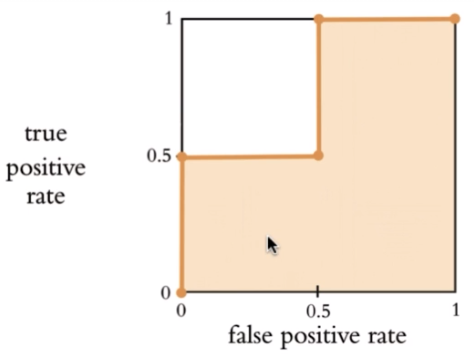
</div>


- if the algorithm is good, the rate results are closer to one, meaning a plot like the "purple" one below (having no false positives or false negatives). A random model would give the 0.5 results, as it is a binary classfication and its 50% chance getting it right or wrong.

<div>
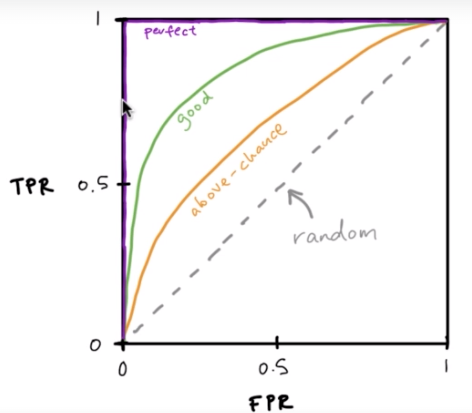
</div>


#### Calculating integral using python

In [3]:
from scipy.integrate import quad

In [4]:
def g(x):
    return x/2

In [5]:
quad(g, 1, 2)

(0.75, 8.326672684688674e-15)

#### Area under the curve of the Receiver Operating Characteristic curve

In [6]:
from sklearn.metrics import auc

In [7]:
xs = [0, 0, 0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1, 1]

In [8]:
auc(xs, ys) # same as the integration using quad

0.75

### Probability and Information Theory
- Quantifying uncertainty (chance or meanningful observation)
- Provides framework for supporting or rejecting hypothesis
- In ML, we can use the probaility to scale the model to large, high-dimensional data

#### Events and Sample Spaces
- sample space: all possible outcomes

$ P(\text{event})=\frac{\# \text{of outcomes of event}}{\# \text{of outcomes in the sample space}}$

#### Combinatorics
- total number of events (sample space): $n$
- desired vents: $k$

$ \binom{n}{k}=\frac{n!}{k!(n - k)!}$

In [25]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [26]:
def combinat(n, k):
    # finds the combinations between sample space and events
    comb = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    # calculates the probability of happening
    P = comb/(2**n)
    return P, comb

In [27]:
combinat(5, 3)

(0.3125, 10.0)

In [28]:
[combinat(5, h) for h in range(6)]

[(0.03125, 1.0),
 (0.15625, 5.0),
 (0.3125, 10.0),
 (0.3125, 10.0),
 (0.15625, 5.0),
 (0.03125, 1.0)]